D:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32047 (\N{CJK UNIFIED IDEOGRAPH-7D2F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 35745 (\N{CJK UNIFIED IDEOGRAPH-8BA1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 35299 (\N{CJK UNIFIED IDEOGRAPH-89E3}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 37322 (\N{CJK UNIFIED IDEOGRAPH-91CA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26041 (\N{CJK UNIFIED IDEOGRAPH-65B9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\Lib\site

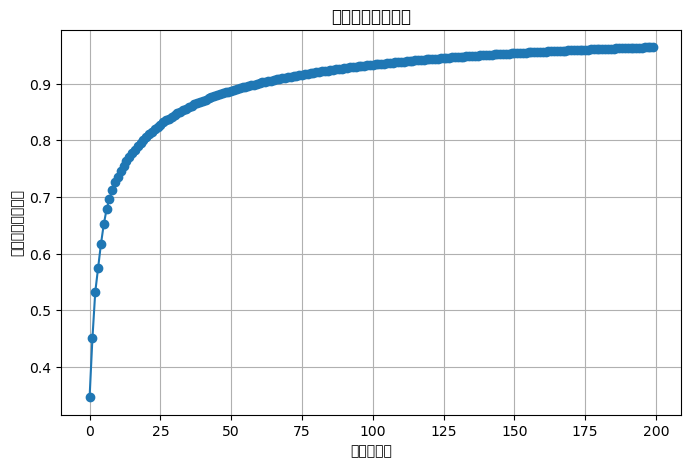

交叉验证平均准确率: 0.81


D:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20934 (\N{CJK UNIFIED IDEOGRAPH-51C6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30830 (\N{CJK UNIFIED IDEOGRAPH-786E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20132 (\N{CJK UNIFIED IDEOGRAPH-4EA4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21449 (\N{CJK UNIFIED IDEOGRAPH-53C9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\Lib\site

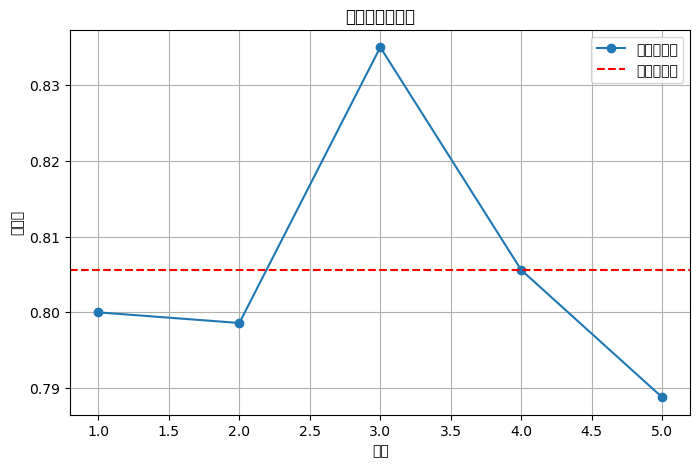

验证集准确率: 0.55


D:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 39564 (\N{CJK UNIFIED IDEOGRAPH-9A8C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 35777 (\N{CJK UNIFIED IDEOGRAPH-8BC1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 38598 (\N{CJK UNIFIED IDEOGRAPH-96C6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\Lib\site

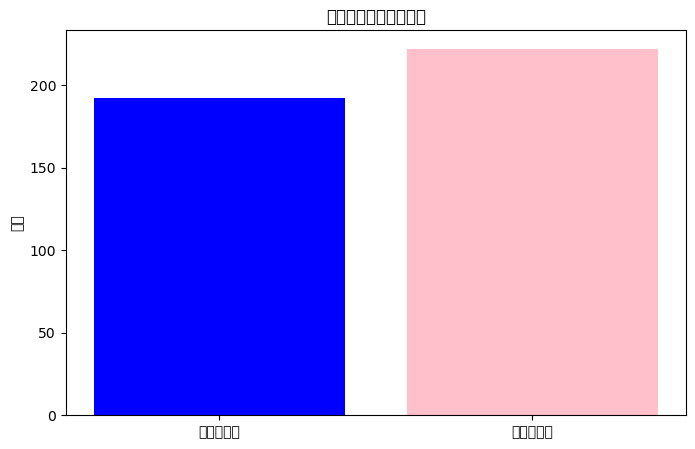

In [113]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.decomposition import IncrementalPCA
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 数据集路径
train_dir = r"C:\Users\Herunzhang\Desktop\sex"
val_dir = r"C:\Users\Herunzhang\Desktop\sex_test"
label_file = r"C:\Users\Herunzhang\Desktop\faceDR"

# 图像大小调整参数
IMG_SIZE = (64, 64)  # 统一调整为64x64大小

def load_data(data_dir, label_file):
    """加载数据和标签"""
    images = []
    labels = []
    label_dict = {}

    # 读取标签文件，假设格式为 "id (_sex male) ..."
    with open(label_file, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) > 2 and parts[1] == "(_sex":
                file_id = parts[0]
                gender = parts[2].strip(')')
                label_dict[file_id] = 1 if gender == "male" else 0  # male -> 1, female -> 0

    # 遍历文件夹加载图像
    for subdir, dirs, files in os.walk(data_dir):
        for file in files:
            file_path = os.path.join(subdir, file)
            file_id = os.path.splitext(file)[0]  # 假设文件名对应标签中的 id
            if file_id in label_dict:
                # 读取图像并调整大小为统一尺寸
                img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    img = cv2.resize(img, IMG_SIZE)
                    images.append(img.flatten())  # 展平图像为向量
                    labels.append(label_dict[file_id])

    if len(images) == 0 or len(labels) == 0:
        raise ValueError(f"数据加载失败：目录 {data_dir} 中无有效数据或标签文件 {label_file} 不匹配。")

    return np.array(images), np.array(labels)

# 加载训练数据和验证数据
X_train, y_train = load_data(train_dir, label_file)
X_val, y_val = load_data(val_dir, label_file)

# 使用增量PCA降维
n_components = 200  # 降维到200个主成分
ipca = IncrementalPCA(n_components=n_components)

# 分批次训练增量PCA
batch_size = 300  # 每次处理300个样本
for i in range(0, X_train.shape[0], batch_size):
    X_batch = X_train[i:i + batch_size]
    ipca.partial_fit(X_batch)

# 对训练集和验证集进行降维
X_train_pca = ipca.transform(X_train)
X_val_pca = ipca.transform(X_val)

# 可视化主成分贡献率
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(ipca.explained_variance_ratio_), marker='o')
plt.title('累计主成分贡献率')
plt.xlabel('主成分数量')
plt.ylabel('累计解释方差比例')
plt.grid()
plt.show()

# 定义KNN分类器
clf = KNeighborsClassifier(n_neighbors=5)  # 选用5个邻居

# 交叉验证
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_accuracies = []
for train_index, test_index in skf.split(X_train_pca, y_train):
    X_train_cv, X_test_cv = X_train_pca[train_index], X_train_pca[test_index]
    y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]

    # 训练分类器
    clf.fit(X_train_cv, y_train_cv)

    # 验证分类器
    y_pred_cv = clf.predict(X_test_cv)
    accuracy = accuracy_score(y_test_cv, y_pred_cv)
    cv_accuracies.append(accuracy)

# 输出交叉验证平均准确率
cv_mean_accuracy = np.mean(cv_accuracies)
print(f"交叉验证平均准确率: {cv_mean_accuracy:.2f}")

# 可视化交叉验证准确率
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cv_accuracies) + 1), cv_accuracies, marker='o', label='每折准确率')
plt.axhline(y=cv_mean_accuracy, color='r', linestyle='--', label='平均准确率')
plt.title('交叉验证准确率')
plt.xlabel('折数')
plt.ylabel('准确率')
plt.legend()
plt.grid()
plt.show()

# 在验证集上进行测试
clf.fit(X_train_pca, y_train)  # 在所有训练数据上训练模型
y_pred_val = clf.predict(X_val_pca)
val_accuracy = accuracy_score(y_val, y_pred_val)
print(f"验证集准确率: {val_accuracy:.2f}")

# 可视化验证集预测结果
plt.figure(figsize=(8, 5))
plt.bar(['预测为男性', '预测为女性'], [np.sum(y_pred_val == 1), np.sum(y_pred_val == 0)], color=['blue', 'pink'])
plt.title('验证集中性别预测分布')
plt.ylabel('数量')
plt.show()
